# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # para visualização de informações

## K fold

In [2]:
from kfold import k_folds, train_values, test_values

## Models

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.pipeline import Pipeline

## Metrics

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Text to list

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Reading and visualizing data

In [7]:
#Lembre de fazer upload dele nos arquivos do colab
PATH = "./data/iliad_sentiments.csv"

In [8]:
df = pd.read_csv(PATH)  
df

,greek text,english text,neutral,positive,negative,narrator,y,class
0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",Apollo’s priest to th’ Argive fleet doth bring,0.375,0.500,0.125,0.0,"[0.375, 0.5, 0.125, 0.0]",positive
1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...","Gifts for his daughter, pris’ner to the king;",0.125,0.250,0.625,0.0,"[0.125, 0.25, 0.625, 0.0]",negative
2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,For which her tender’d freedom he entreats;,0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...","But, being dismiss’d with contumelious threats,",0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,"At Phœbus’ hands, by vengeful pray’r, he seeks",0.500,0.125,0.375,0.0,"[0.5, 0.125, 0.375, 0.0]",neutral
...,...,...,...,...,...,...,...,...
606,κει που 'χε χτίσει στον καθένα τους παλάτι ο κ...,"Address’d for sleep, where ev’ry one, with art...",0.375,0.625,0.000,0.0,"[0.375, 0.625, 0.0, 0.0]",positive
607,"ο ξακουστός τεχνίτης Ήφαιστος, με τη σοφή του ...",By heav’n’s great both-foot-halting God a sev’...,0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
608,"Κι ο Δίας ο Ολύμπιος, ό αστραπόχαρος, στην κλί...","Ev’n he to sleep went, by whose hand heav’n is...",0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
609,"εκεί που ως τώρα πάντα, ως του 'ρχονταν ύπνος ...","High Jove, where he had us’d to rest when swee...",0.125,0.875,0.000,0.0,"[0.125, 0.875, 0.0, 0.0]",positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   greek text    611 non-null    object 
 1   english text  611 non-null    object 
 2   neutral       611 non-null    float64
 3   positive      611 non-null    float64
 4   negative      611 non-null    float64
 5   narrator      611 non-null    float64
 6   y             611 non-null    object 
 7   class         611 non-null    object 
dtypes: float64(4), object(4)
memory usage: 38.3+ KB


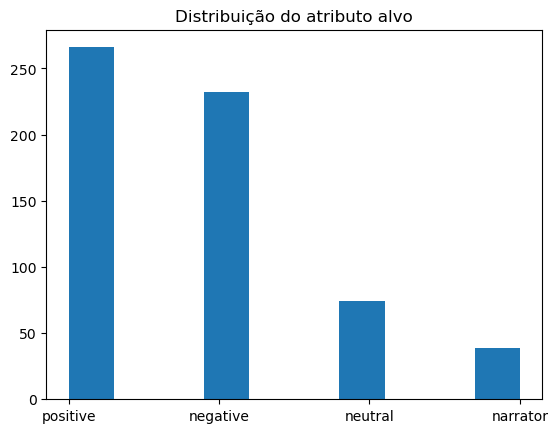

In [10]:
## Distribuição do atributo alvo
plt.hist(df['class'])
plt.title("Distribuição do atributo alvo")
plt.show()

# Pre processing

In [11]:
import numpy as np

**Target dict**

In [12]:
id2target = {
    0: "negative",
    1: "positive",
    2: "neutral",
    3: "narrator",
}

In [13]:
target2id = {id2target[target_id]: target_id for target_id in id2target}
target2id

{'negative': 0, 'positive': 1, 'neutral': 2, 'narrator': 3}

**X & Y list**

In [14]:
X = df["greek text"].tolist()
y = np.array([target2id[y] for y in df["class"].tolist()]) 

# TF-IDF

**Spliting k folds**

In [15]:
folds = k_folds(X=X, y=y, k=4, shuffle=True)

## Naive Bayes

In [16]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    #Naive Bayes
    text_nb = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
        ])

    text_nb.fit(X_train, y_train)
    predicted = text_nb.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    
nb_metrics = {}
    
nb_metrics["accuracy"] = np.average(accuracy_list)
nb_metrics["recall"] = np.average(recall_list)
nb_metrics["precision"] = np.average(precision_list)

print(nb_metrics)

{'accuracy': 70.0, 'recall': 27.878812754456327, 'precision': 22.952227406340967}


C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\skl

## Decision Tree

In [17]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    text_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)),
    ])

    text_tree.fit(X_train, y_train)
    predicted = text_tree.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)

dt_metrics = {}
    
dt_metrics["accuracy"] = np.average(accuracy_list)
dt_metrics["recall"] = np.average(recall_list)
dt_metrics["precision"] = np.average(precision_list)

print(dt_metrics)

{'accuracy': 71.0, 'recall': 38.25535779644313, 'precision': 31.85613378123736}


C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [18]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    text_knn = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(n_neighbors=5)),
    ])

    text_knn.fit(X_train, y_train)
    predicted = text_knn.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)

knn_metrics = {}
    
knn_metrics["accuracy"] = np.average(accuracy_list)
knn_metrics["recall"] = np.average(recall_list)
knn_metrics["precision"] = np.average(precision_list)

print(knn_metrics)

{'accuracy': 73.75, 'recall': 37.146898071695425, 'precision': 43.063354945958416}


# SBERT

In [19]:
#!pip install -U sentence-transformers

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('lighteternal/stsb-xlm-r-greek-transfer')

C:\Users\Katia\anaconda3\envs\illiad\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
X_train_sbert = model.encode(X_train)
X_test_sbert = model.encode(X_test)

## Decision Tree

In [23]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    X_train_sbert = model.encode(X_train)
    X_test_sbert = model.encode(X_test)
    
    text_dt = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
    text_dt.fit(X_train_sbert, y_train)
    predicted = text_dt.predict(X_test_sbert)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    
dt_metrics = {}
    
dt_metrics["accuracy"] = np.average(accuracy_list)
dt_metrics["recall"] = np.average(recall_list)
dt_metrics["precision"] = np.average(precision_list)

print(dt_metrics)

{'accuracy': 55.25, 'recall': 34.04707097271422, 'precision': 32.966533811799266}


# CÓDIGOS DE EXEMPLO

### Functions to greek text

Não está funcionando

In [ ]:
!pip install cltk

In [ ]:
from cltk.stem.lemma import LemmaReplacer
#from cltk.corpus.utils.formatter import cltk_normalize

In [ ]:
from cltk.stem.lemma import LemmaReplacer
sentence = 'λόγων λογίων'
lemmatizer = LemmaReplacer('greek')
lemmatizer.lemmatize(sentence, return_raw=True)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Bag of Words**

In [ ]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
X_train_counts.shape

**TF-IDF**

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
X_train_tfidf.shape

In [ ]:
def get_bow(X_train, X_test):
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)
    X_test_counts = count_vect.fit_transform(X_test)
    
    return X_train_counts, X_test_counts

In [ ]:
def get_tfidf(X_train, X_test):
    X_train_counts, X_test_counts = get_bow(X_train, X_test)
    
    tfidf_transformer = TfidfTransformer()
    
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
    
    return X_train_tfidf, X_test_tfidf

### Testar com lematização e stemming

Sugestões que encontrei:
- https://legacy.cltk.org/en/latest/greek.html#lemmatization
- https://github.com/kpech21/Greek-Stemmer

# UMAP

Diminuir a dimensionalidade do SBERT

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
X_umap_train = umap.UMAP().fit_transform(X_train_sbert)
X_umap_test = umap.UMAP().fit_transform(X_test_sbert)

# Naive Bayes

In [ ]:
#TF-IDF

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT

text_clf = MultinomialNB()
text_clf.fit(X_train_sbert, y_train)
predicted = text_clf.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_clf = MultinomialNB()
text_clf.fit(X_umap_train, y_train)
predicted = text_clf.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#TF-IDF

text_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)),
])

text_tree.fit(X_train, y_train)
predicted = text_tree.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_train_sbert, y_train)
predicted = text_tree.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_umap_train, y_train)
predicted = text_tree.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
text_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])

text_knn.fit(X_train, y_train)
predicted = text_knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

Normalizar e diminuir a dimensionalidade

In [ ]:
#SBERT

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_train_sbert, y_train)
predicted = text_knn.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_umap_train, y_train)
predicted = text_knn.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")